In [35]:
import pandas as pd

In [36]:
#Loading dataset and understanding it

In [37]:
df = pd.read_csv('data/heart.csv')

In [38]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [39]:
#Train-Test Split

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
#EDA and Preprocessing

In [42]:
X = df.drop('target', axis=1)
y = df['target']

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:
#1. Training the Decision Tree Classifier and visualizing the Tree

In [45]:
#- Training the Decision Tree

In [46]:
from sklearn.tree import DecisionTreeClassifier

In [47]:
dt = DecisionTreeClassifier(random_state=42)

In [48]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [49]:
#- Visualizing the Tree

In [50]:
from sklearn.tree import plot_tree #Using plot_tree
import matplotlib.pyplot as plt

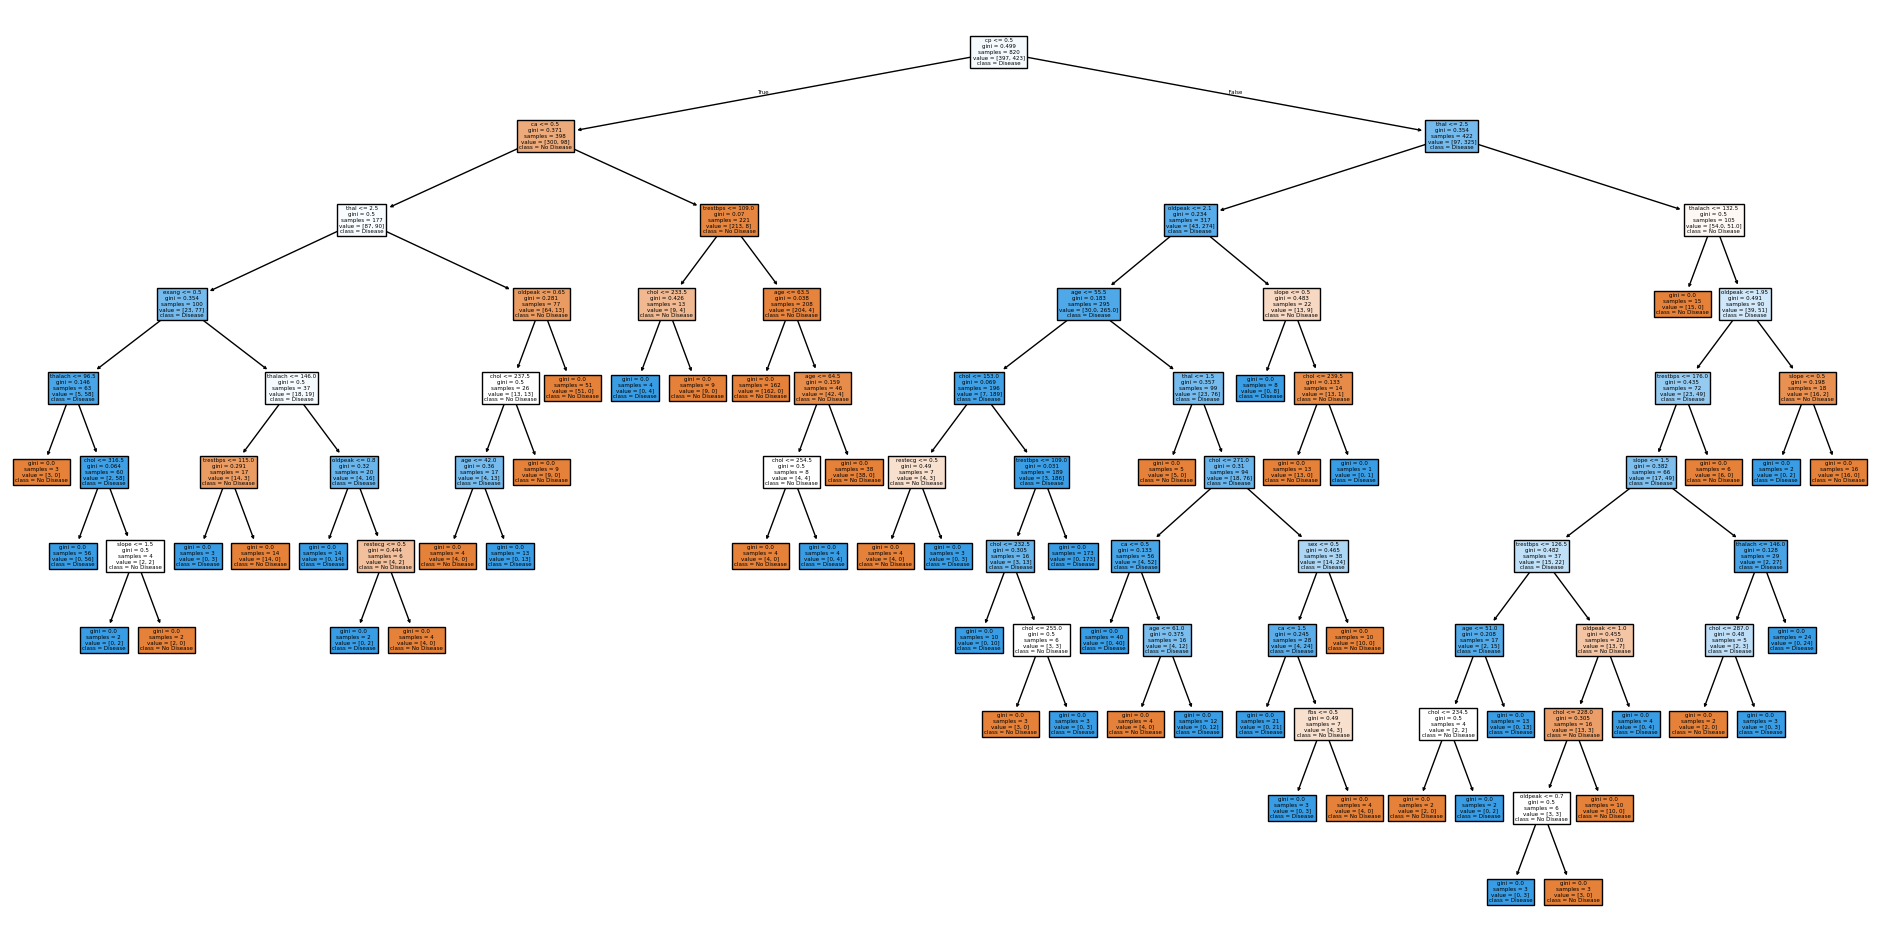

In [51]:
plt.figure(figsize=(24,12))
plot_tree(dt, filled=True, feature_names=X.columns, class_names=["No Disease", "Disease"])
plt.show()

In [52]:
#2. Analyzing Overfitting and controlling tree depth

In [53]:
from sklearn.metrics import accuracy_score

In [54]:
print("Train Accuracy: ", accuracy_score(y_train, dt.predict(X_train)))
print("Test Accuracy: ", accuracy_score(y_test, dt.predict(X_test)))

Train Accuracy:  1.0
Test Accuracy:  0.9853658536585366


In [55]:
# With max_depth

In [56]:
dt_small = DecisionTreeClassifier(max_depth=4, random_state=42)
dt_small.fit(X_train, y_train)
print("Tuned test Accuracy: ", accuracy_score(y_test, dt_small.predict(X_test)))

Tuned test Accuracy:  0.8


In [57]:
#3. Training a Random Forest and comparing accuracy

In [58]:
from sklearn.ensemble import RandomForestClassifier

In [59]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
print("Random Forest Test Accuracy: ", accuracy_score(y_test, rf.predict(X_test)))

Random Forest Test Accuracy:  0.9853658536585366


In [60]:
#4. Interpreting feature importances

In [61]:
import seaborn as sns

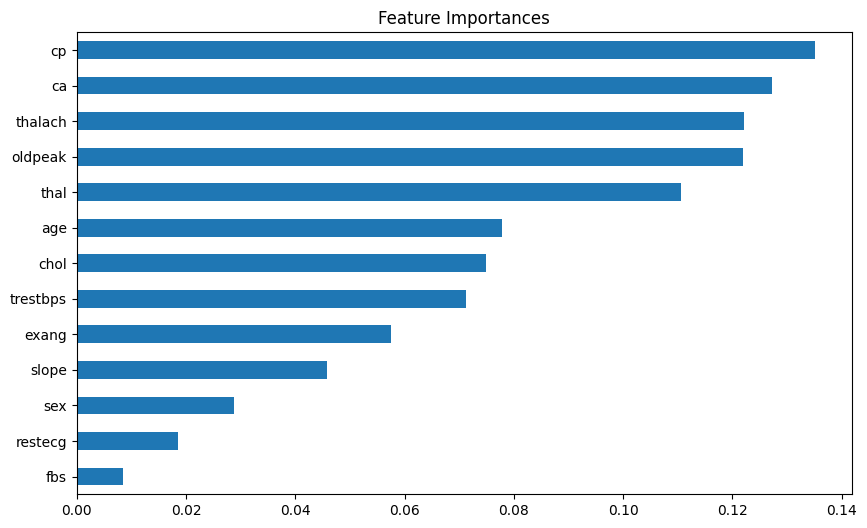

In [62]:
importances = pd.Series(rf.feature_importances_, index=X.columns)
importances.sort_values().plot(kind='barh', figsize=(10,6), title='Feature Importances')
plt.show()

In [63]:
#5. Evauluate using Cross-Validation

In [64]:
from sklearn.model_selection import cross_val_score

In [65]:
scores = cross_val_score(rf, X, y, cv=5)
print("Cross-Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())

Cross-Validation Scores:  [1.         1.         1.         1.         0.98536585]
Average CV Score:  0.9970731707317073
